**Problem Statement**

The dataset details the sales of specific residential properties in Ames between 2006 and 2010 (a small town in Iowa, USA). The author is Dean De Cock. The dataset consist of 2930 rows and 82 columns which contain both nummerical and categorical data.The sale price depend on various variable like in which year it was built, new property or old one, area it withheld and many other factors. The dataset contains lot of categorical columns also which we can be convertted into binary using one hot encoding. By plotting the graphs we will visualise the relation between two factors and after cleaning the data will apply the linear regression technique in order to predict the sales price of the houses.


The pandas and the numpy library is used inorder to deal with the data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

"read_csv" is the pandas library function which we will use inorder to load the csv file (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). The matplotlib library and seaborn library is used to plot the data into graphs or br charts to get some insights from it.

In [2]:
df= pd.read_csv("Dataset.csv")

In [3]:
df

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


###  Formatting of the Data

The dataset consist of 2930 rows and 82 columns which is printed by using the .shape fuction.

In [6]:
print('The Dataset has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

The Dataset has 2930 rows and 82 columns.


**Numerical Features**

Values that may be measured and arranged logically are known as numerical data. Their characteristics are numerical descriptions of the many attributes of an item. There are 39 columns that contains the numerical features. They are Order, PID, MSSubClass, LOtArea,LotFrontage, OverallCond, YearBuilt, OverallQual, MasVnrArea etc. These are being extrated from the df dataframe using the select_dtypes function from the pandas library.

In [65]:
numCols = list(df.select_dtypes(exclude='object').columns)
print(f"There are {len(numCols)} numerical features:\n", numCols)

There are 39 numerical features:
 ['Order', 'PID', 'MSSubClass', 'LotFrontage ', 'LotArea ', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemod/Add', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch ', 'PoolArea ', 'MiscVal', 'MoSold', 'YrSold ', 'SalePrice']


**Categorical Features**

Categorical data is a body of knowledge that is organised into categories. For instance, the data obtained when an organisation or agency tries to collect the biodata of its personnel is referred to as categorical data (https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/). Becausethe variables in the biodata, including sex, state of residence, etc., may be used to categorise the data, it is known as categorical data. The df dataframe contains the 43 categorical data column like Street, Alley, LotShape, LandContour etc.

In [66]:
catCols = list(df.select_dtypes(include='object').columns)
print(f"There are {len(catCols)} numerical features:\n", catCols)

There are 43 numerical features:
 ['  MSZoning ', 'Street', 'Alley', 'LotShape ', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', ' SaleType', 'SaleCondition']


The DataFrame's information is explained using the info() function. The data includes the total number of columns, their labels, data kinds, memory use, range index, and the number of cells in each column (non-null values).

In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order          2930 non-null   int64  
 1   PID            2930 non-null   int64  
 2   MSSubClass     2930 non-null   int64  
 3     MSZoning     2930 non-null   object 
 4   LotFrontage    2440 non-null   float64
 5   LotArea        2930 non-null   int64  
 6   Street         2930 non-null   object 
 7   Alley          198 non-null    object 
 8   LotShape       2930 non-null   object 
 9   LandContour    2930 non-null   object 
 10  Utilities      2930 non-null   object 
 11  LotConfig      2930 non-null   object 
 12  LandSlope      2930 non-null   object 
 13  Neighborhood   2930 non-null   object 
 14  Condition1     2930 non-null   object 
 15  Condition2     2930 non-null   object 
 16  BldgType       2930 non-null   object 
 17  HouseStyle     2930 non-null   object 
 18  OverallQ

**Statistical Information**

The dataset contains the 2930 rows and 82 columns whose mean value and the standard deviation value whose value depend upon the whole column value and it varies from column to column. The count shows the number of non-empty values which also varies from column to column. It also describe the percentile of the dataset i.e. 25%, 50%, 75% where percentile refers to the proportion of values that fall below the specified percentile. This statistical information is only fro the numerical features. it does not get applied on the categorical features.

In [7]:
df.describe()

,Order,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


**Unique Values**

Lambda function is an anonymous function which is a special type of function without the using the function name. The unique keyword is used here is to describe the total number of unique values that a column is containing like Yrsold has 5 unique value i.e it varries from year 2006 to year 2010, saletype contains 10 unique values etc.

In [8]:
df.apply(lambda x: len(x.unique()))

Order            2930
PID              2930
MSSubClass         16
  MSZoning          7
LotFrontage       129
                 ... 
MoSold             12
YrSold              5
 SaleType          10
SaleCondition       6
SalePrice        1032
Length: 82, dtype: int64

**NULL Values**

The isnull() keyword is used to identify whether the column contains the null valur or not. In our dataframe i.e. df temp and atemp are the 2 columns that are having the null values. These NULL values can be either filled by using the mean or the median.If the column contains NULL values more than 75% of the total row count then we can drop that column also because it will not effect our data much and does not provide any relevant information (Thalheim, Bernhard & Schewe, Klaus-dieter. (2010). NULL 'Value' algebras and logics. Frontiers in Artificial Intelligence and Applications. 225. 354-367. 10.3233/978-1-60750-689-8-354) 

In [15]:
df.isnull().sum().head(60)

Order               0
PID                 0
MSSubClass          0
  MSZoning          0
LotFrontage       490
LotArea             0
Street              0
Alley            2732
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemod/Add       0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType         23
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           80
BsmtCond           80
BsmtExposure       83
BsmtFinType1       80
BsmtFinSF1          1
BsmtFinType2       81
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF  

## Plotting the Data

**Plotting the Data**

By using the various python library likr matplotlib, seaborn we can plot the dataset in order to find some insights from it that we can not see from the numeric values (https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)

In [18]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

The histogram is plotted betwwen the sale price on x-axis and number of houses on y-axis in order to find what is the average price of the houses that are sold, what is the maximum price of the house and the minimum price of the house.

From the data given, we get to the conclusion that the average price on which houses get solds is         $180796.                                       

The cheapest price on which the house is sold is 12,789 dollar and the most expensive price is $ 755000.                                     

Cheapest house sold for $12,789 and the expensive for $755,000
The average sales price is $180,796


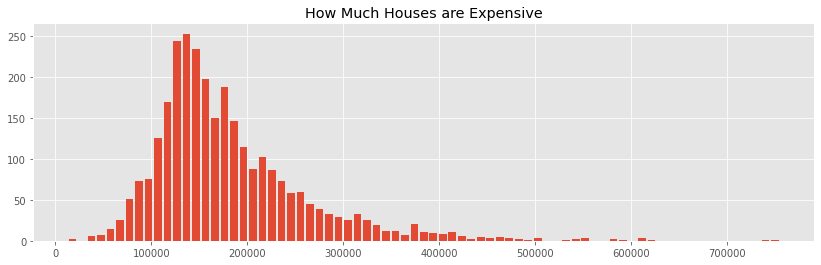

In [25]:
print('Cheapest house sold for ${:,.0f} and the expensive for ${:,.0f}'.format(df.SalePrice.min(), df.SalePrice.max()))
print('The average sales price is ${:,.0f}'.format(df.SalePrice.mean()))
df.SalePrice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How Much Houses are Expensive')
plt.show()

The below histogram give us the information about the construction of the house done year wise. The 20 year of gap is taken into consideration i.e. the houses built in the year 1880 to 1899. From the figure the hidden information trhat we get is that the oldest house was built in 1872 and the newest was built in the year 2010.

Oldest house built in the year 1872. Newest house built in the year 2010.


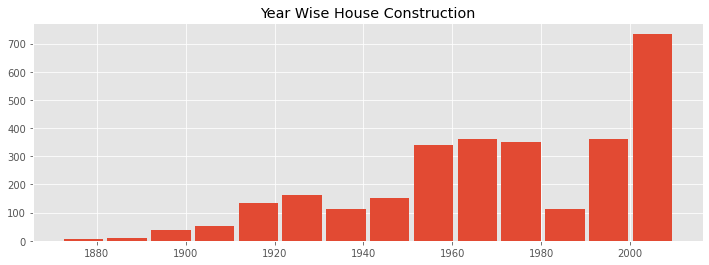

In [27]:
print('Oldest house built in the year {}. Newest house built in the year {}.'.format(df.YearBuilt.min(), df.YearBuilt.max()))
df.YearBuilt.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('Year Wise House Construction')
plt.show()

The dataset also contain the information about the house which are sold on the yearly bases and the on the monthly bases also. The below graph depicts that information only.In year 2007, maximum number od houses were being sold and the minimum were sold in 2010.

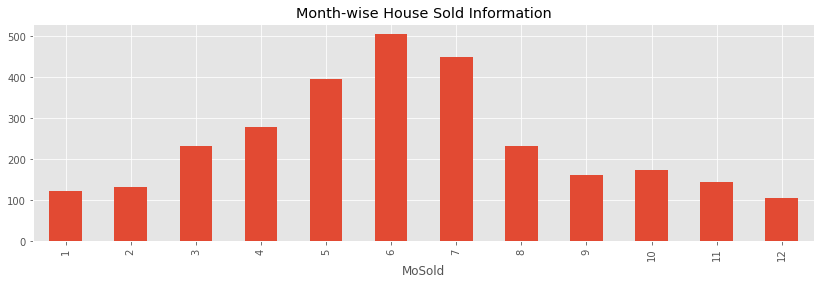

In [29]:
df.groupby(['MoSold']).Order.count().plot(kind='bar', figsize=(14,4))
plt.title('Month-wise House Sold Information')
plt.show()

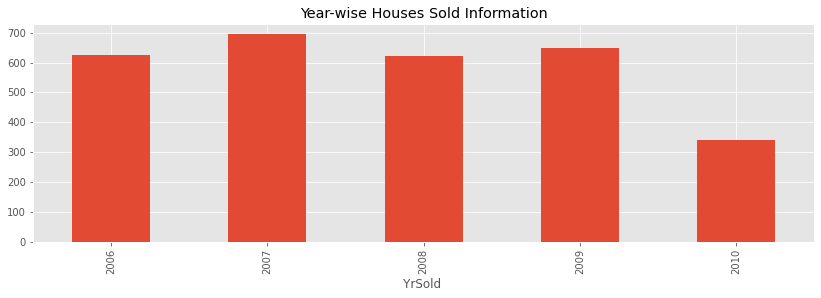

In [30]:
df.groupby(['YrSold ']).Order.count().plot(kind='bar', figsize=(14,4))
plt.title('Year-wise Houses Sold Information')
plt.show()

When we merge both the information i.e year wise sold information and month wise house sold information we get to know that in the year 2006 and in the month of July maximum number of house swere sold after that maximum number of houses were sold in the year 2009 in the month of June. The minimum number of houses were sold in the year 2010 and in the month of July.House sales have a clear seasonal trend, with peaks in June and July. We confirm that the dataset covers the years 2006 to 2010, although we should point out that data steps were mid-year in July 2010.

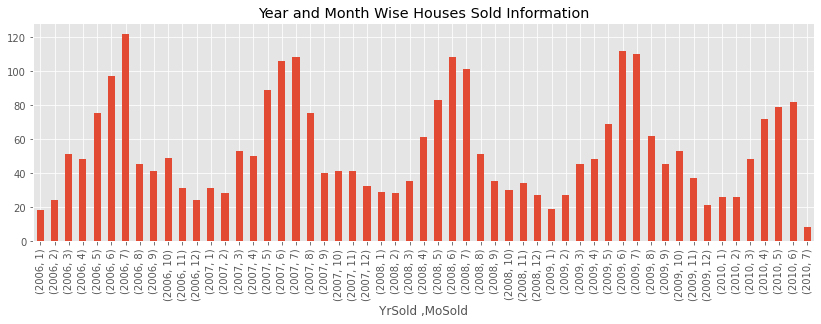

In [31]:
df.groupby(['YrSold ','MoSold']).Order.count().plot(kind='bar', figsize=(14,4))
plt.title('Year and Month Wise Houses Sold Information')
plt.show()

The Neighboorhood column contains the information about the physical locations within Ames city limits. Those physical locations are Bluestem, Brookside, College Creek, Gilbert etc. After plotting the information we get to know that maximum neighbours are of Northwest Ames and least are of Green Hills and Landmark.

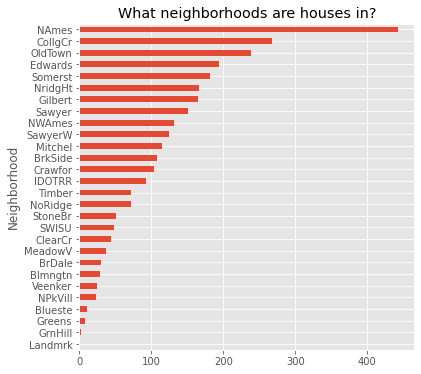

In [32]:
df.groupby('Neighborhood').Order.count().\
    sort_values().\
    plot(kind='barh', figsize=(6,6))
plt.title('What neighborhoods are houses in?')
plt.show()

The dataset also contains the information about the size of the house i.e how big houses are (in sq feet). The average size of the house is 1,500 sq ft and the biggest house is of the 5,642 sq ft while the smallest size of the house is 334 sq ft. The size of the house plays an important role in deciding the sales price of the house as if the size of the house is big then the sales price of that will also be more and vice versa.

The average house has 1,500 sq ft of space, the median 1,442 sq ft
The biggest house has 5,642 sq ft of space, the smallest 334 sq ft


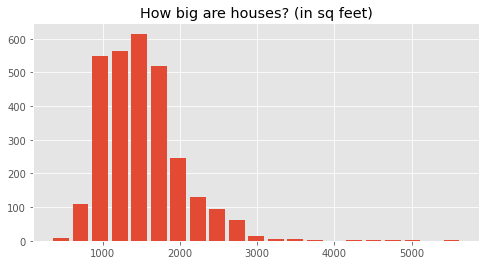

In [33]:
print('The average house has {:,.0f} sq ft of space, the median {:,.0f} sq ft'.format(df.GrLivArea.mean(), df.GrLivArea.median()))
print('The biggest house has {:,.0f} sq ft of space, the smallest {:,.0f} sq ft'.format(df.GrLivArea.max(), df.GrLivArea.min()))
df.GrLivArea.hist(bins=21, rwidth=.8, figsize=(8,4))
plt.title('How big are houses? (in sq feet)')
plt.show()

**Correlated Features**

Any statistical relationship between two random variables or bivariate data, whether causal or not, is referred to in statistics as correlation or dependence. Although "correlation" can mean any kind of association in the broadest sense, in statistics it typically refers to the strength of a pair of variables' linear relationships (Tolosi, Laura & Lengauer, Thomas. (2011). Classification with correlated features: Unreliability of feature ranking and solutions. Bioinformatics (Oxford, England). 27. 1986-94. 10.1093/bioinformatics/btr300). Python's Pandas Dataframe.corr() function is used to determine the pairwise correlation of each column. Any NaN values are immediately disregarded. The Dataframe ignores any columns or data types that are not numeric.

According to below analyses, Overall Quality, Living Area, Year Built, Number of Full Baths, Size of Garage and Year Built are some of the most important features in determining house price.

In [35]:
correlated = df.corr().SalePrice.sort_values(ascending=False)

In [36]:
correlated

SalePrice        1.000000
OverallQual      0.799262
GrLivArea        0.706780
GarageCars       0.647877
GarageArea       0.640401
TotalBsmtSF      0.632280
1stFlrSF         0.621676
YearBuilt        0.558426
FullBath         0.545604
YearRemod/Add    0.532974
GarageYrBlt      0.526965
MasVnrArea       0.508285
TotRmsAbvGrd     0.495474
Fireplaces       0.474558
BsmtFinSF1       0.432914
LotFrontage      0.357318
WoodDeckSF       0.327143
OpenPorchSF      0.312951
HalfBath         0.285056
BsmtFullBath     0.276050
2ndFlrSF         0.269373
LotArea          0.266549
BsmtUnfSF        0.182855
BedroomAbvGr     0.143913
ScreenPorch      0.112151
PoolArea         0.068403
MoSold           0.035259
3SsnPorch        0.032225
BsmtFinSF2       0.005891
MiscVal         -0.015691
YrSold          -0.030569
Order           -0.031408
BsmtHalfBath    -0.035835
LowQualFinSF    -0.037660
MSSubClass      -0.085092
OverallCond     -0.101697
KitchenAbvGr    -0.119814
EnclosedPorch   -0.128787
PID         

The distribution of SalePrice is right-skewed. The majority of the data falls to the right, or positive side, of the graph's peak in a right-skewed distribution, sometimes referred to as a "positively skewed" distribution. This causes the right side of the histogram, or its "tail," to be longer than the left.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


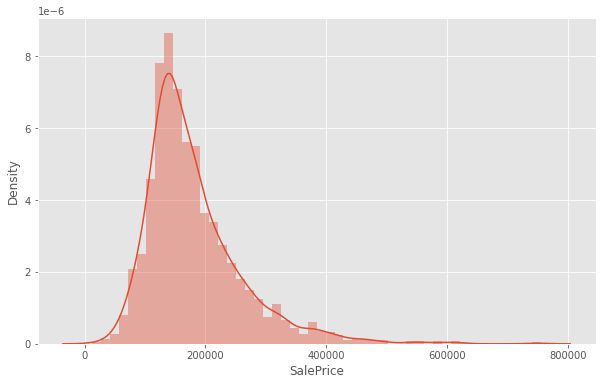

In [38]:
plt.figure(figsize=(10,6))
sns.distplot(df.SalePrice)
plt.show()

A measure of symmetry, or more specifically, the absence of symmetry, is called skewness. If a distribution or data set appears the same to the left and right of the centre point, it is said to be symmetrical. Kurtosis is a metric that indicates how heavy-tailed or light-tailed the data are in comparison to a normal distribution. The distribution is highly skewed if skewness is more than or equal to one and less than -1. The distribution is considered to be highly skewed if the skewness is between -1 and -0.5 or between 0.5 and 1. If the distribution's skewness is between -0.5 and 0.5, it is roughly symmetric (Journal of Statistics Education Volume 19, Number 2(2011),
www.amstat.org/publications/jse/v19n2/doane.pdf). Since, in our case the value comes out to be 1.744 which means that our data is highly skewed.

In [39]:
print('Skew: {:.3f} | Kurtosis: {:.3f}'.format(df.SalePrice.skew(), df.SalePrice.kurtosis()))

Skew: 1.744 | Kurtosis: 5.119


Plotted the distribution of various numerical features. This will help us to understand the data and how it is distributed. The seaborn library is used which have the function to plot the distribution of the values. The would help us to whether the various numerical features are negatively or positively skewed.A few of the characteristics that are visible seem to be favourably biassed, much like SalePrice. These are some of the things we'll want to track transform: LotFrontage, LotArea, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, GrLivAre, and GarageArea.



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

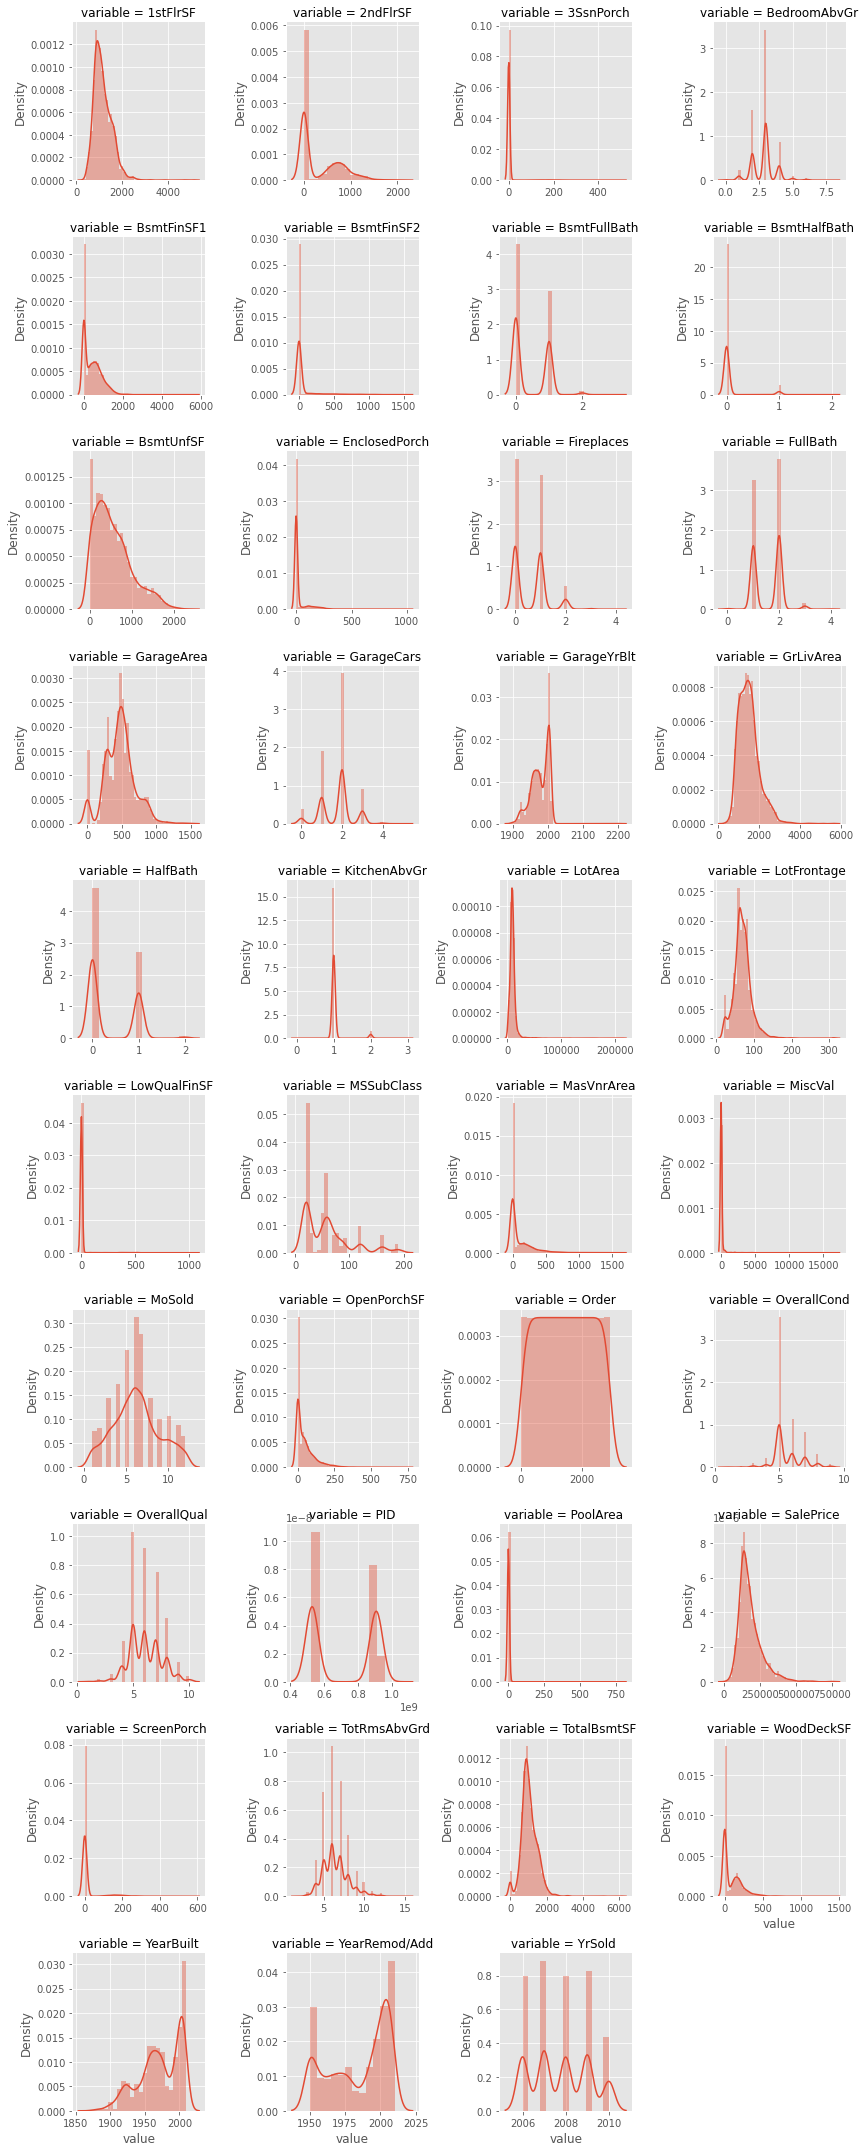

In [70]:
grid = pd.melt(df, value_vars=sorted(numCols))
plot = sns.FacetGrid(grid, col='variable', col_wrap=4, sharex=False, sharey=False)
plot= plot.map(sns.distplot, 'value')

Some features can be considered as count data, and which doent needed to be transformed. They are: BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotalRmsAbvGr, Fireplaces, GarageCars. The fraction of empty and filled cells in a database table are referred to as sparsity and density, respectively. The density and sparsity should add up to 100%. 10% of the cells in a 10% dense table have non-zero values in them. As a result, it is 90% sparse, which means that 90% of its cells are either empty or contain zeros. In our dataset the level of sparsity of pool area, 3SsnPorch, LowQualFinSf, MisVal is more than 85% which means that either all these cells are empty or they just contain 0 as a value.



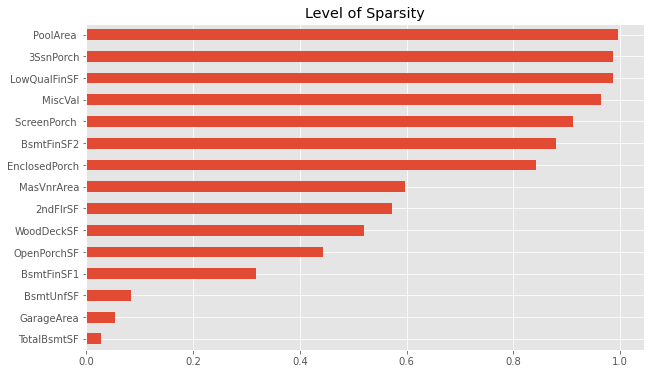

In [73]:
count_features = ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
                  'KitchenAbvGr','TotalRmsAbvGr','Fireplaces','GarageCars']
non_count_features = [f for f in numCols if f not in count_features]
sparse_features = (df[non_count_features] == 0).sum() / df.shape[0]
sparse_features[sparse_features > 0].\
    sort_values(ascending=True).\
    plot(kind='barh', figsize=(10,6))
plt.title('Level of Sparsity')
plt.show()

After plotting the numerical features now we will plot the categorical data using the countplot function of seaborn library.To display the counts of observations in each category bin using bars.                  
There are many categorical characteristics that really include rank information; as a result, they should be transformed into discrete quantitative features like OverallQual. ExterQual, for instance, has the following values:                                                    
Ex - Outstanding                                                           
GG - Good                                                                
TA - Typical/Average                                                      
Fair - Fa                                                         
Poor - Po                                                                
Change them to be from 1 to 5. Alley, LotShape, LandContour, Utilities, LandSlope, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQuality, GarageCond, PavedDrive, PoolQC.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


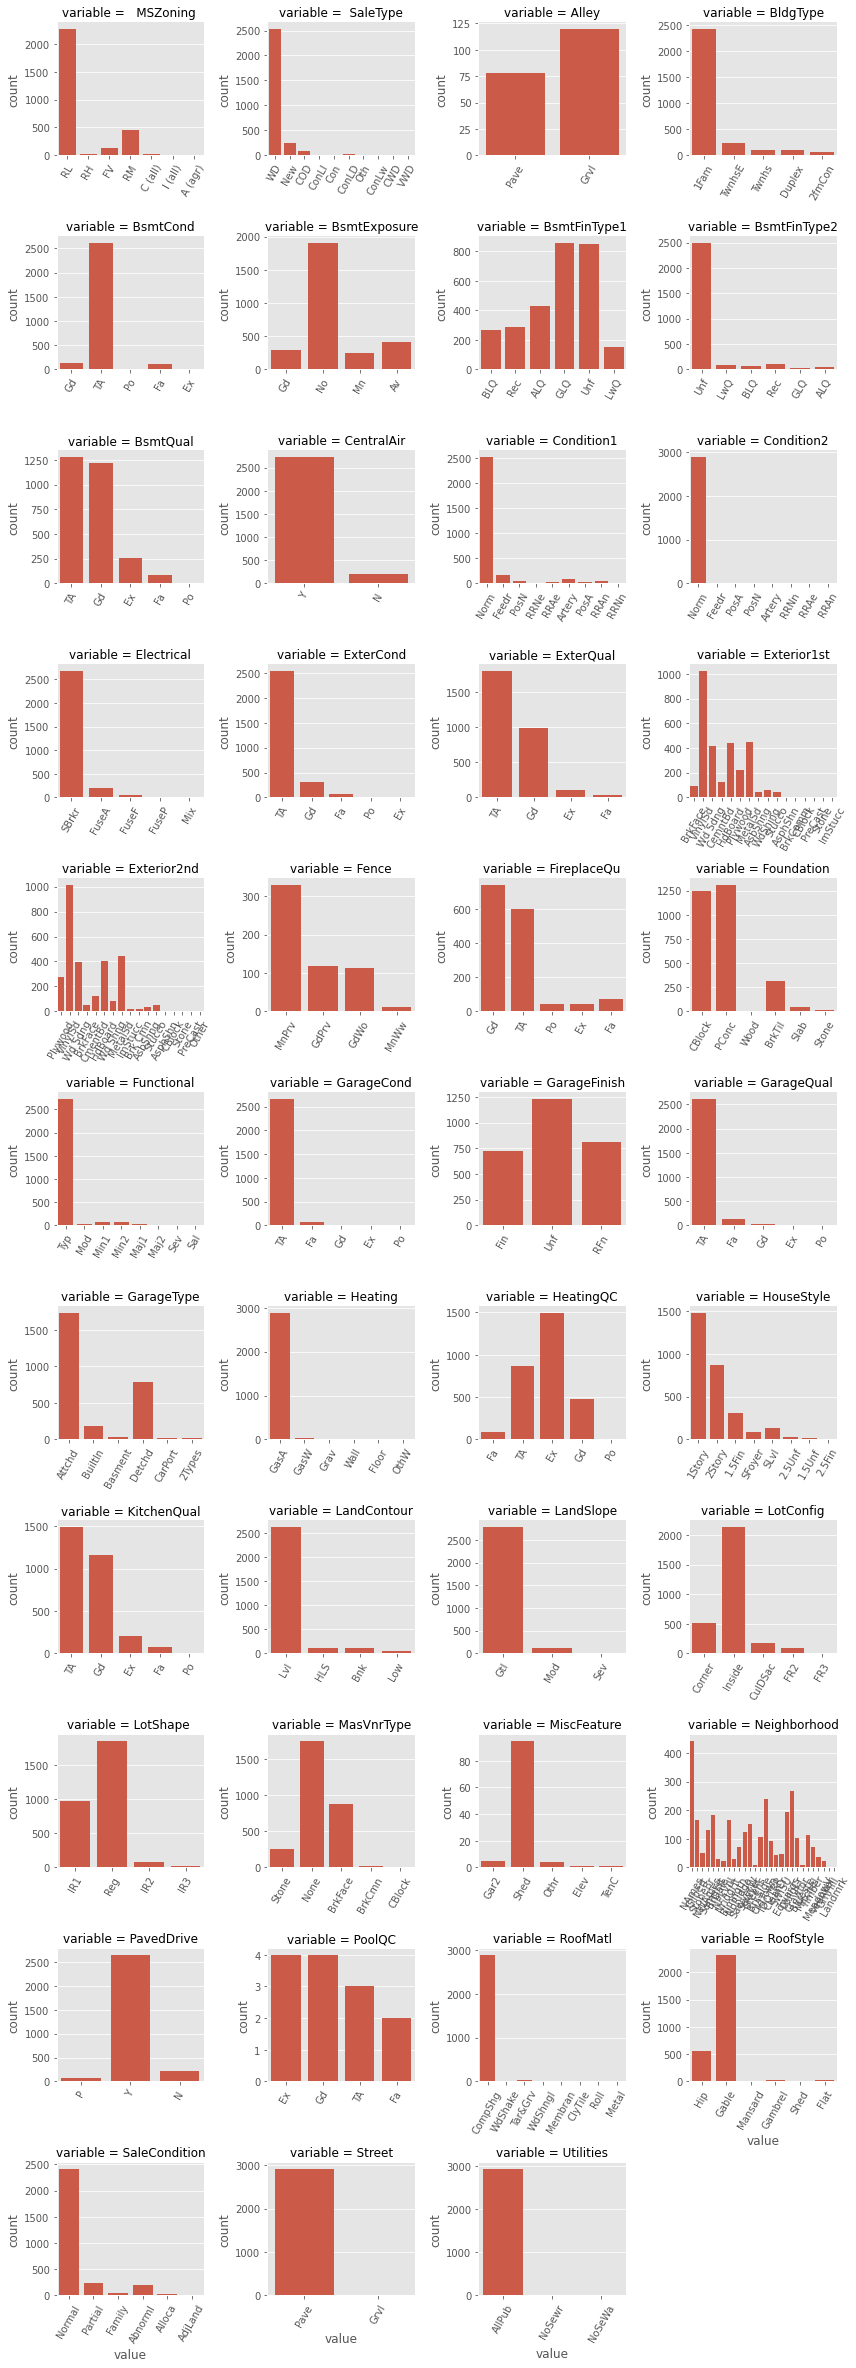

In [77]:
plot = pd.melt(df, value_vars=sorted(catCols))
box_plot = sns.FacetGrid(plot, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = box_plot.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in box_plot.axes.flat]
g.fig.tight_layout()
plt.show()

## Data Cleaning


**Bivariate Analysis**

We want to change the categorical features to numerical features because the contain ranked information (e.g. quality ratings). We'll make those transforms so that they are properly included in our data.
We're also going to replace missing values with 0.


In [84]:
df.Alley.replace({'Grvl':1, 'Pave':2}, inplace=True)

# Lot Shape
#df.LotShape.replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)

# Land Contour
df.LandContour.replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)

# Utilities
df.Utilities.replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)

# Land Slope
df.LandSlope.replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)

# Exterior Quality
df.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Exterior Condition
df.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Quality
df.BsmtQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Condition
df.BsmtCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Exposure
df.BsmtExposure.replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)

# Finished Basement 1 Rating
df.BsmtFinType1.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Finished Basement 2 Rating
df.BsmtFinType2.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Heating Quality and Condition
df.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Kitchen Quality
df.KitchenQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Home functionality
df.Functional.replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)

# Fireplace Quality
df.FireplaceQu.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Finish
df.GarageFinish.replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)

# Garage Quality
df.GarageQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Condition
df.GarageCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Paved Driveway
df.PavedDrive.replace({'N':1, 'P':2, 'Y':3}, inplace=True)

# Pool Quality
df.PoolQC.replace({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# We'll set all missing values in our newly converted features to 0
converted_features = ['Alley','LandContour','Utilities','LandSlope','ExterQual','ExterCond',
        'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
        'KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual',
        'GarageCond','PavedDrive','PoolQC']
df[converted_features] = df[converted_features].fillna(0)

# Update our list of numerical and categorical features
numCols, catCols = get_feature_groups()

The graphs that show the association between two variables in a data collection are called scatter plots. It displays data points either on a Cartesian system or a two-dimensional plane. The X-axis is used to represent the independent variable or characteristic, while the Y-axis is used to plot the dependent variable. These diagrams or graphs are often used to describe these plots. Plotting the scatter plot of various numerical features against the sales price.

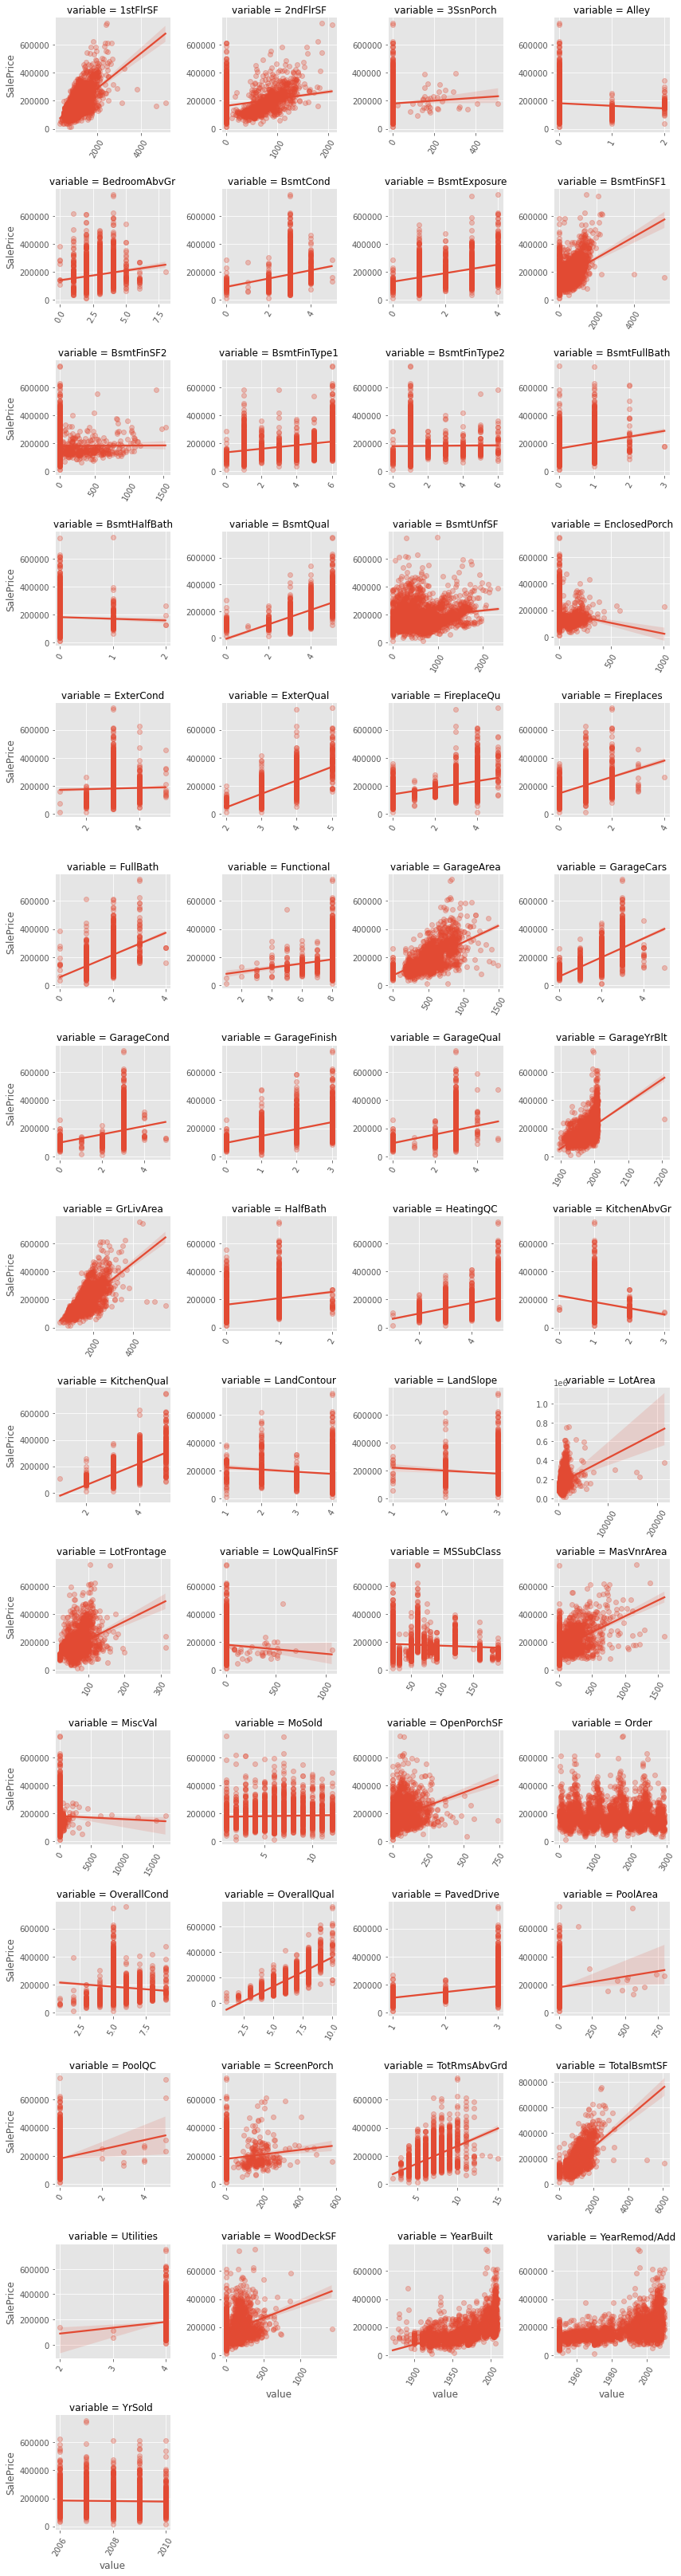

In [85]:
f = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(numCols))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.regplot, 'value', 'SalePrice', scatter_kws={'alpha':0.3})
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

We find that there are quite a few features that seem to show strong correlation to SalePrice, such as OverallQual, TotalBsmtSF, GrLivArea, and TotRmsAbvGrd. This hepls to draw an important conclusion that high quality, big house with big basements and lots of rooms to be more expensive than the small house that does not have lots of rooms with no or small basement.

The occurrence of cone shapes, an artifact of our skewed distributions. Once we log transform some of these features, the relationship will be more linear.

The correlation between numerical features with the sales price is plotted inorder to find the how they correlated with each other.

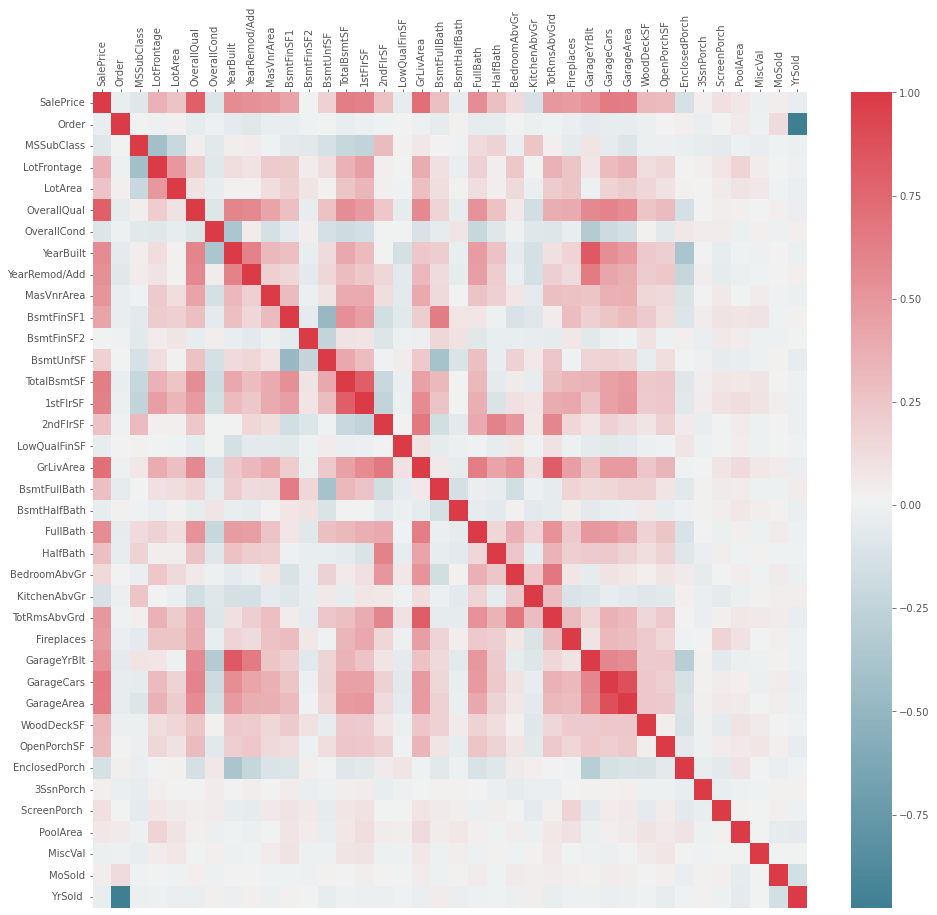

In [86]:
corr = df[['SalePrice'] + num_features].corr()
fig = plt.figure(figsize=(16,15))
ax = fig.add_subplot(111)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.index.values,
           cmap=cmap)
ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

We see a significant amount of association between traits, including several that one could anticipate finding and maybe some unexpected ones. For instance, we see that GarageYrBlt and YearBuilt have a strong correlation, indicating that the majority of garages were constructed at the same time as the home. BsmtQual and OverallQual have strong correlations, while TotalBsmtSF and 1stFlrSF have strong correlations as well. Additionally, we observe a strong correlation between KitchenQual and ExteriorQual. Although kitchens and home exteriors are obviously distinct, this correlation may indicate the presence of a hidden variable, such as "new house," as a newer home is likely to have both a better exterior and a better kitchen.

Feature sorted by correlation to SalePrice, from positive to negative.The feature most correlated with SalePrice is OverallQual, which makes sense, followed by the size of the house (GrLivArea) and then three more quality related features: ExterQual, KitchenQual, and BsmtQual. We noted earlier that ExterQual and KitchenQual were highly correlated with one another, and now we find out that they are both also highly correlated with SalePrice. In regression we usually want to avoid including predictors highly correlated with one another to minimize multicollinearity.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


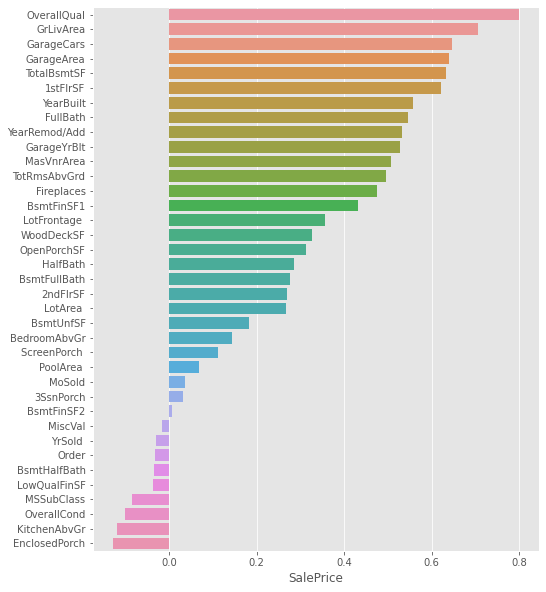

In [87]:
corr = corr.sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot( corr.SalePrice[1:], corr.index[1:], orient='h')
plt.show()

Ploting the count plot of categorical features. The mean SalePrice seems to vary significantly across various groups for several attributes, such as SaleType, SaleNeighborhood, or MSSubClass.

However, we'd prefer a clearer understanding of which feature has a greater impact on sale price than others. We'll compare each category attribute to SalePrice using one-way ANOVA testing. This will provide us with the p-values for each characteristic as well as the F statistic (Ostertagova, Eva & Ostertag, Oskar. (2013). Methodology and Application of One-way ANOVA. American Journal of Mechanical Engineering. 1. 256-261. 10.12691/ajme-1-7-21). We will finally order the features by p-value since the p-value will take into account a certain F distribution (depending on the number of groups and observations) and the higher the F statistic, the higher the p-value (i.e., the more confident we may be in rejecting the null hypothesis) (instead of F). It indicates our level of confidence in ruling out the null hypothesis. The more unlikely it is, the more significantly the feature affects the dependent variable SalePrice.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


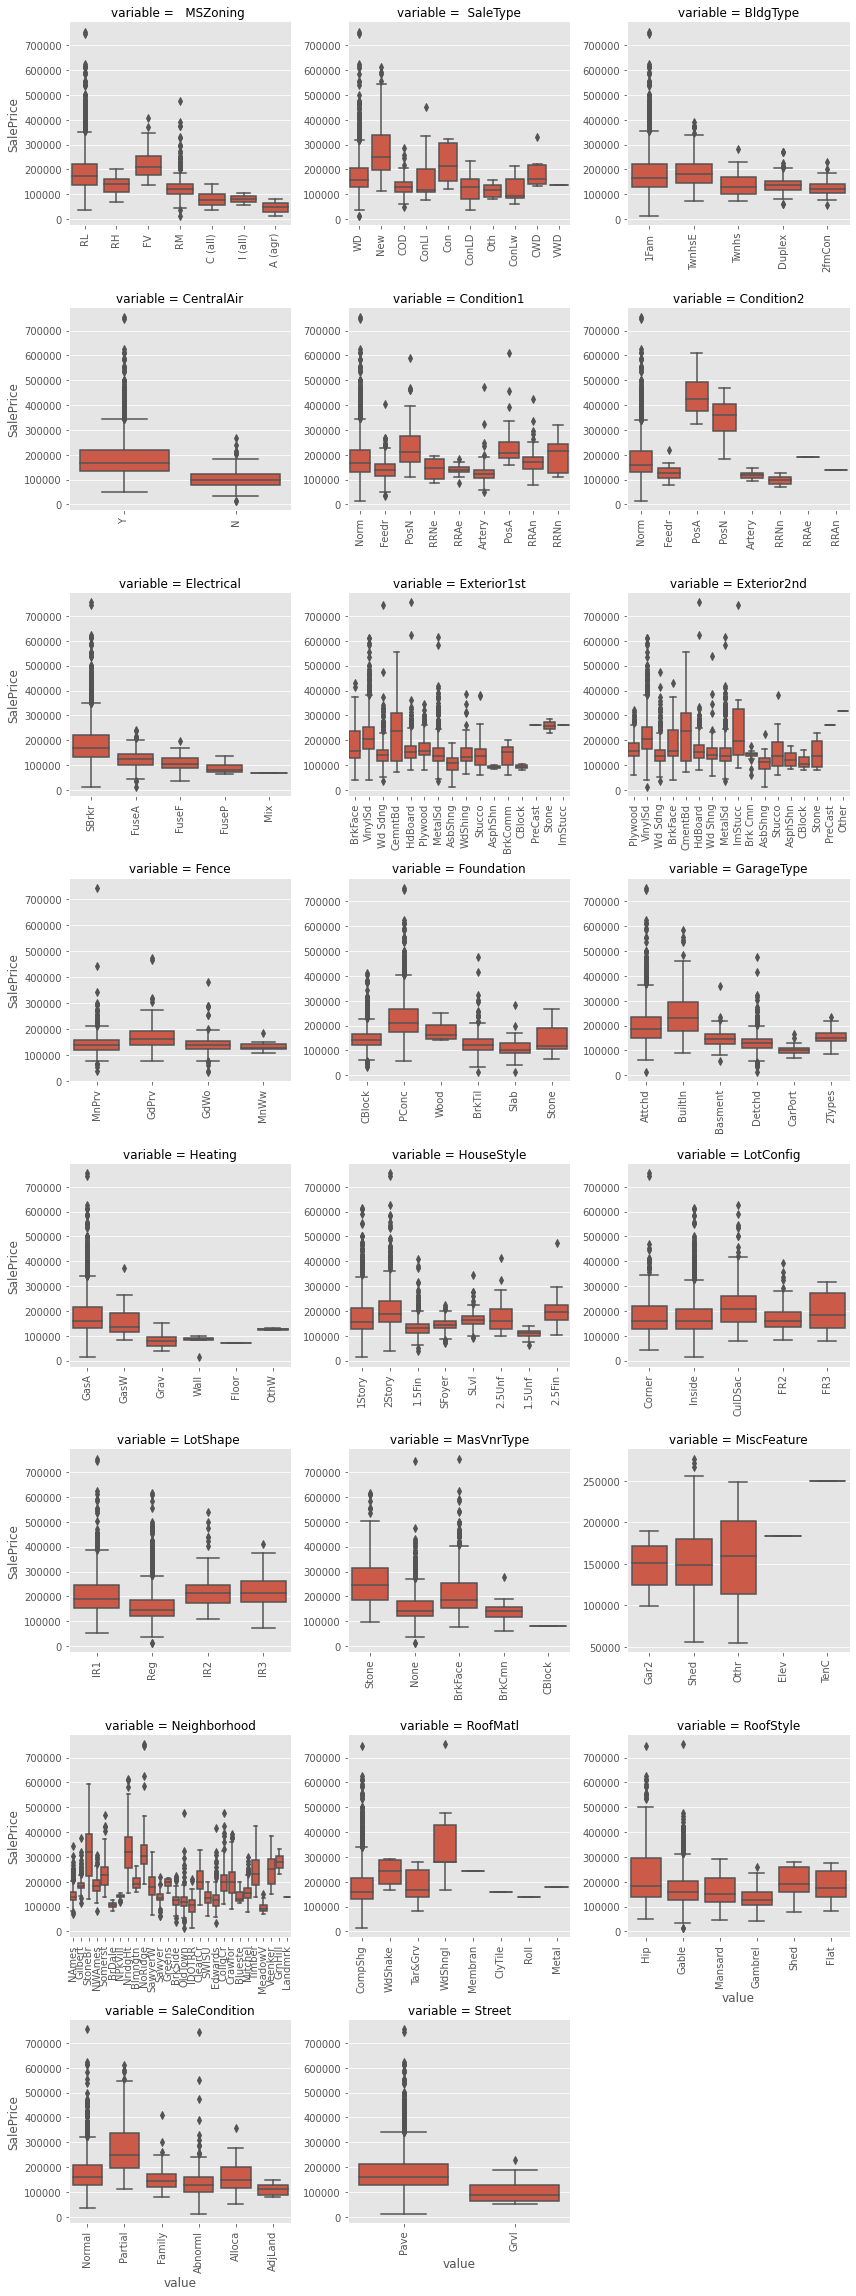

In [88]:
f = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(catCols))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


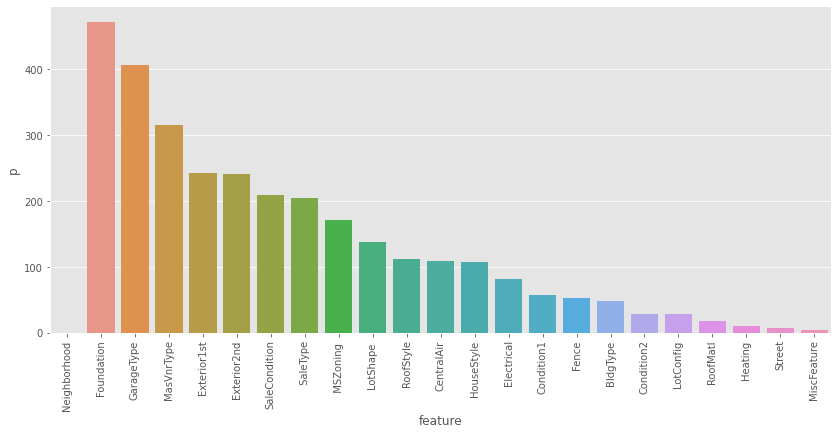

In [90]:
import scipy.stats

df[catCols] = df[catCols].fillna('Missing')

anova = {'feature':[], 'f':[], 'p':[]}
for cat in catCols:
    group_prices = []
    for group in df[cat].unique():
        group_prices.append(df[df[cat] == group]['SalePrice'].values)
    f, p = scipy.stats.f_oneway(*group_prices)
    anova['feature'].append(cat)
    anova['f'].append(f)
    anova['p'].append(p)
anova = pd.DataFrame(anova)
anova = anova[['feature','f','p']]
anova.sort_values('p', inplace=True)

# Plot
plt.figure(figsize=(14,6))
sns.barplot(anova.feature, np.log(1./anova['p']))
plt.xticks(rotation=90)
plt.show()

Finding the duplicate values in our dataset (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html)

In [92]:
print('df IDs: {}'.format(df.duplicated('PID').sum()))

df IDs: 0


Finding the categorical columns that contains the missing data. These values can be filled either using the different satistical parameters like mean, median or mode.

In [93]:
missing_values = (df[catCols] == 'Missing').sum().sort_values(ascending=False)
missing_values[missing_values > 0]

MiscFeature    2824
Fence          2358
GarageType      157
MasVnrType       23
Electrical        1
dtype: int64

In [96]:
df.loc[df.Electrical == 'Missing', 'Electrical'] = df.Electrical.mode()[0]

In [97]:
df

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,0.0,IR1,4,...,0,0.0,Missing,Missing,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,0.0,Reg,4,...,0,0.0,MnPrv,Missing,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,0.0,IR1,4,...,0,0.0,Missing,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,0.0,Reg,4,...,0,0.0,Missing,Missing,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,0.0,IR1,4,...,0,0.0,MnPrv,Missing,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,0.0,IR1,4,...,0,0.0,GdPrv,Missing,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,0.0,IR1,1,...,0,0.0,MnPrv,Missing,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,0.0,Reg,4,...,0,0.0,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,0.0,Reg,4,...,0,0.0,Missing,Missing,0,4,2006,WD,Normal,170000


In [98]:
df.MasVnrType.value_counts()

None       1752
BrkFace     880
Stone       249
BrkCmn       25
Missing      23
CBlock        1
Name: MasVnrType, dtype: int64

In [99]:
df.MasVnrType.replace({'Missing':'None'}, inplace=True)

In [101]:
df.loc[(df.MasVnrType == 'None') & (df.MasVnrArea > 1), 'MasVnrType'] = 'BrkFace' # most common 
df.loc[(df.MasVnrType == 'None') & (df.MasVnrArea == 1), 'MasVnrArea'] = 0 # 1 sq ft is basically 0
for vnr_type in df.MasVnrType.unique():
    # so here we set the area equal to the mean of the given veneer type
    df.loc[(df.MasVnrType == vnr_type) & (df.MasVnrArea == 0), 'MasVnrArea'] = \
        df[df.MasVnrType == vnr_type].MasVnrArea.mean() 

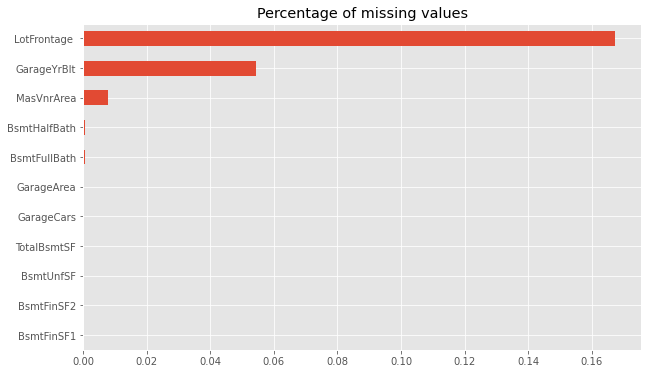

In [102]:
missing_data = df.isnull().sum() / df.shape[0]
missing_data[missing_data > 0].\
    sort_values(ascending=True).\
    plot(kind='barh', figsize=(10,6))
plt.title('Percentage of missing values')
plt.show()


In [104]:
df.MasVnrArea.fillna(0, inplace=True)

In [106]:
df.GarageYrBlt.fillna(0, inplace=True)

Before submitting the data set for analysis, it was desired to exclude 5 observations (a plot of SALE PRICE versus GR LIV AREA will help us to understand that better). Two of these are just atypical transactions, but three of them are real outliers (partial sales that probably don't reflect actual market prices) (very large houses priced relatively appropriately).

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


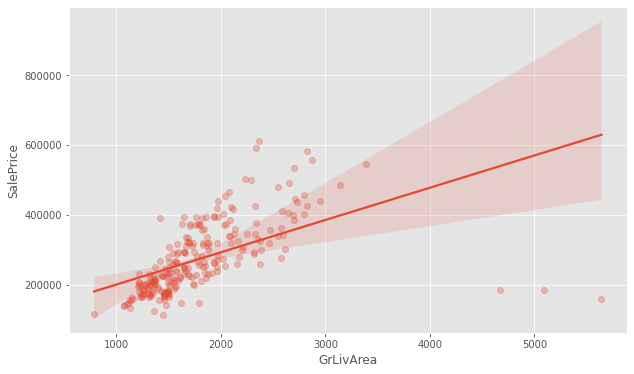

In [108]:
plt.figure(figsize=(10,6))
sns.regplot(df[df.SaleCondition == 'Partial'].GrLivArea,
            df[df.SaleCondition == 'Partial'].SalePrice, scatter_kws={'alpha':0.3})
plt.show()

In [109]:
df.drop(df[df.GrLivArea >= 4000].index, inplace=True)

Adding the diffrent columns into one like totalsf by adding totalbsmtsf and grlivarea etc in order to make our dataset more informative with less number of irrelevant information.

In [116]:
df['TotalSF'] = df.TotalBsmtSF + df.GrLivArea
df['TotalFloorSF'] =df['1stFlrSF'] + df['2ndFlrSF']
df['TotalPorchSF'] = df.OpenPorchSF + df.EnclosedPorch + \
    df['3SsnPorch'] 
    
# Total Bathrooms
df['TotalBathrooms'] = df.FullBath + .5 * df.HalfBath + \
    df.BsmtFullBath + .5 * df.BsmtHalfBath

# Booleans
df['HasBasement'] = df.TotalBsmtSF.apply(lambda x: 1 if x > 0 else 0)
df['HasGarage'] = df.GarageArea.apply(lambda x: 1 if x > 0 else 0)
df['HasPorch'] = df.TotalPorchSF.apply(lambda x: 1 if x > 0 else 0)
df['IsNew'] = (df.YearBuilt > 2000).astype(np.int64)
df['WasCompleted'] = (df.SaleCondition != 'Partial').astype(np.int64)

boolean_features = ['HasBasement', 'HasGarage', 'HasPorch', 'HasPool', 
                    'WasRemodeled', 'IsNew', 'WasCompleted']

In [117]:
numCols, catCols = get_feature_groups()
numCols = [f for f in numCols if f not in boolean_features]

Earlier we have seen some of the numerical features exhibit positive skew and could benefit from a log transform. Now transforming them using the log transformation. It is primarily used to convert a skewed distribution to a normal distribution/less-skewed distribution. (Feng C, Wang H, Lu N, Chen T, He H, Lu Y, Tu XM. Log-transformation and its implications for data analysis. Shanghai Arch Psychiatry. 2014 Apr;26(2):105-9. doi: 10.3969/j.issn.1002-0829.2014.02.009. Erratum in: Gen Psychiatr. 2019 Sep 6;32(5):e100146corr1. PMID: 25092958; PMCID: PMC4120293). In this transform, we take the log of the values in a column and use these values as the column instead.

In [118]:
features = numCols+ ['SalePrice']
for f in features:
    df.loc[:,f] = np.log1p(df[f])

When the characteristics are nominal, we use this method of categorical data encoding (do not have any order). We produce a new variable in a single hot encoding for each level of a category feature. A binary variable with the values 0 or 1 is assigned to each category. In this case, 0 denotes the lack of that category while 1 denotes its existence.

Dummy variables are the name given to these just constructed binary characteristics. The category variable's levels determine how many dummy variables are needed (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [119]:
y = df['SalePrice']
df.drop('SalePrice', axis=1, inplace=True)
df.drop('PID', axis=1, inplace=True)

In [120]:
model_data = pd.get_dummies(df).copy()

## Exploratory Data Analysis Techniques


**Splitting the data**

With the help of sklearn library we can import train test split which will help us to divide our data into two phases i.e. traing and testing. Data splitting is a crucial component in building data-driven models. This method aids in ensuring the accuracy of data model construction and the processes that employ data models, such as machine learning. When machine learning algorithms are used to generate predictions on data that was not used to train the model, their performance is estimated using the train-test split technique. It is a quick and simple process to carry out, and the results let you evaluate the effectiveness of machine learning algorithms for your particular predictive modelling issue.

According to empirical study, the best results are obtained when 20–30% of the initial data points are used for testing and the remaining 70–80% for training. Using the train test split function of sklearn library for splitting the dataset.(Stone, M. “Cross-Validatory Choice and Assessment of Statistical Predictions.” Journal of the Royal Statistical Society. Series B (Methodological), vol. 36, no. 2, 1974, pp. 111–47. JSTOR, http://www.jstor.org/stable/2984809).

In [122]:
from sklearn.model_selection import train_test_split

The train test split is imported from the sklearn library in order to split our dataset i.e. X and Y into testing and training dataset. Three tectonic movements are represented by the 70/30 Principle, which collectively upend our stale and outdated conventional learning paradigm. (Sajjan, Mahantesh. (2020). Re: 70% training and 30% testing spit method in machine learning.. Retrieved from: https://www.researchgate.net/post/70_training_and_30_testing_spit_method_in_machine_learning/5eec743bd027d10a5f743b00/citation/download).By keeping the above mentioned thing in mind, 70-30 split is done i.e 70% of the data is taken for the testing aprt and rest 30% is for the traing part in order to validate the results.

In [123]:
X_train, X_test, y_train, y_test = train_test_split(model_data.copy(), y, test_size=0.3, random_state=42)
print('Shapes')
print('X_train:', X_train.shape)
print('X_val:', X_test.shape)
print('y_train:', y_train.shape)
print('y_val:', y_test.shape)

Shapes
X_train: (2047, 245)
X_val: (878, 245)
y_train: (2047,)
y_val: (878,)


On the data values that have a normal distribution, standardisation is employed. Additionally, standardisation tends to make the dataset's mean equal to 0 and its standard deviation equal to 1. Applying standardisation in our dataset in order to make the value lie between 0 and 1.

In [124]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [127]:
stdsc = StandardScaler()
X_train.loc[:,numCols] = stdsc.fit_transform(X_train[numCols])
X_test.loc[:,numCols] = stdsc.transform(X_test[numCols])

The cross_val_score calculates the R squared metric for the applied model. R squared error close to 1 implies a better fit and less error.The sklearn library is used in order to predict the cross val score.(Vrdoljak, Anton. (2022). https://www.researchgate.net/post/What-is-the-acceptable-R-squared-in-the-information-system-research-Can-you-provide-some-references/629b8a7b1489d10ffe21fd63/citation/download).

In [132]:
from sklearn.model_selection import cross_val_score

In [133]:
def rsme(model, X, y):
    cv_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
    return np.sqrt(cv_scores)

A variable's value may be predicted using linear regression analysis based on the value of another variable. The dependent variable is the one you want to be able to forecast. The independent variable is the one you're using to make a prediction about the value of the other variable. With the help of one or more independent variables that can most accurately predict the value of the dependent variable, this kind of analysis calculates the coefficients of the linear equation. The differences between expected and actual output values are minimised by linear regression by fitting a straight line or surface. The best-fit line for a set of paired data may be found using simple linear regression calculators that use the "least squares" technique.(Kumari, Khushbu & Yadav, Suniti. (2018). Linear regression analysis study. Journal of the Practice of Cardiovascular Sciences. 4. 33. 10.4103/jpcs.jpcs_8_18).

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
dummy_cols = [col for col in model_data.columns if col not in numCols]
features_to_try = []
for cat in catCols:
    cat_dummies = [c for c in dummy_cols if c.startswith(cat)]
    features_to_try += cat_dummies
    X_train_subset = X_train[numCols]
    X_test_subset = X_test[numCols]
    
    lr = LinearRegression()
    lr.fit(X_train_subset, y_train)
    
    print('Dummy Features: {} | Train RSME: {:.3f} | Test RSME: {:.3f}'.format(
        len(features_to_try), rsme(lr, X_train_subset, y_train).min(), rsme(lr, X_test_subset, y_test).min()))

Dummy Features: 15 | Train RSME: 0.093 | Test RSME: 0.098                                 
Dummy Features: 20 | Train RSME: 0.093 | Test RSME: 0.098                 
Dummy Features: 22 | Train RSME: 0.093 | Test RSME: 0.097                   
Dummy Features: 27 | Train RSME: 0.093 | Test RSME: 0.096                      
Dummy Features: 52 | Train RSME: 0.089 | Test RSME: 0.091                   
Dummy Features: 61 | Train RSME: 0.087 | Test RSME: 0.092                 
Dummy Features: 69 | Train RSME: 0.089 | Test RSME: 0.097                    
Dummy Features: 74 | Train RSME: 0.089 | Test RSME: 0.099                     
Dummy Features: 82 | Train RSME: 0.088 | Test RSME: 0.097                   
Dummy Features: 88 | Train RSME: 0.117 | Test RSME: 0.096                     
Dummy Features: 95 | Train RSME: 0.120 | Test RSME: 0.096                   
Dummy Features: 110 | Train RSME: 0.114 | Test RSME: 0.105                    
Dummy Features: 126 | Train RSME: 0.096 | Test RSME: 0.184                       
Dummy Features: 130 | Train RSME: 0.114 | Test RSME: 9980980004.395             
Dummy Features: 136 | Train RSME: 0.113 | Test RSME: 2699543672.467             
Dummy Features: 142 | Train RSME: 0.093 | Test RSME: 2320662447.874            
Dummy Features: 144 | Train RSME: 0.111 | Test RSME: 5287923136.293          
Dummy Features: 149 | Train RSME: 0.112 | Test RSME: 621483013.359            
Dummy Features: 156 | Train RSME: 0.127 | Test RSME: 1389606590.911   

Dummy Features: 161 | Train RSME: 4497237048.074 | Test RSME: 992098068.414

Dummy Features: 166 | Train RSME: 2009728834.232 | Test RSME: 112907397.837                                                                      
Dummy Features: 178 | Train RSME: 0.155 | Test RSME: 0.160                  
Dummy Features: 183 | Train RSME: 0.128 | Test RSME: 3478230285.982              
Dummy Features: 192 | Train RSME: 0.153 | Test RSME: 0.206                  
Dummy Features: 198 | Train RSME: 0.147 | Test RSME: 7535710308.025           

**Conclusion**

The Ames house price dataset was provided which consist of a 82 columns.These columns contains the both numerical and categorical dataset.Some of the cells were also containing the null or the zero values. In order to check which factors or features were effecting the sales price of the house we need to understand the dataset first. With the help of various python libraries we have plotted the data and got various relevant information like cheapest and expensive house price, size of the house, latest or earliest house built etc. There were various features which were highly correlated with the sales price. They were both numerical and categorical data. In this work, the categorical data was comverted into the numeric data because they were containing the rank information and after the one hot encoding was applied in which a binary variable with the values 0 or 1 is assigned to each category. Then we split the data into 70-30 ratio i.e 70% of thw whole data for the training and 30% of the data fro the testing purpose. The linear regression model was applied in order to predict the sales price of the house.

In future, we can apply different regression techniques which are far more better that loiner regression like SVR, Random forest, Decision tree etc. We can also apply the Random search or Grid search technique inorder to optimise the hyperparameters to make our model more effective and robust.